In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
cnn=Sequential()

cnn.add(Conv2D(input_shape=(28,28,1),kernel_size=(3,3),
              filters=32,activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [5]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [7]:
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
469/469 [==============================] - 50s 106ms/step - loss: 0.5408 - accuracy: 0.8098 - val_loss: 0.3395 - val_accuracy: 0.8770
Epoch 2/30
469/469 [==============================] - 49s 105ms/step - loss: 0.3488 - accuracy: 0.8753 - val_loss: 0.2896 - val_accuracy: 0.8922
Epoch 3/30
469/469 [==============================] - 50s 106ms/step - loss: 0.3003 - accuracy: 0.8929 - val_loss: 0.2658 - val_accuracy: 0.9027
Epoch 4/30
469/469 [==============================] - 49s 104ms/step - loss: 0.2680 - accuracy: 0.9028 - val_loss: 0.2447 - val_accuracy: 0.9111
Epoch 5/30
469/469 [==============================] - 49s 105ms/step - loss: 0.2447 - accuracy: 0.9112 - val_loss: 0.2316 - val_accuracy: 0.9153
Epoch 6/30
469/469 [==============================] - 48s 103ms/step - loss: 0.2231 - accuracy: 0.9191 - val_loss: 0.2332 - val_accuracy: 0.9133
Epoch 7/30
469/469 [==============================] - 48s 103ms/step - loss: 0.2055 - accuracy: 0.9234 - val_loss: 0.2330 - val_ac

In [8]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2658 - accuracy: 0.9333


[0.2657819390296936, 0.9333000183105469]

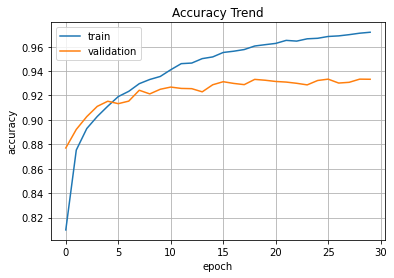

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

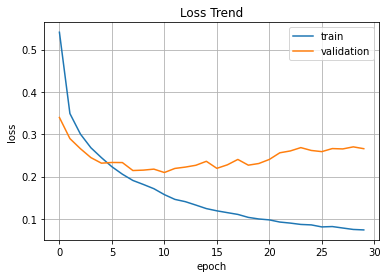

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()